# Extension Analysis of IC443

This tutorial demonstrates how to run a basic extension analysis with the [fermipy](http://fermipy.readthedocs.org) package.  This tutorial assumes that you have first gone through the PG 1553 analysis tutorial.  Additional documentation on running extension analysis is available [here](http://fermipy.readthedocs.org/en/latest/advanced/extension.html).

## Get the Data and Setup the Analysis

For this thread we will use a pregenerated data set which is contained in the following tar archive.

In [1]:
!wget -nc http://www.slac.stanford.edu/~mdwood/fermipy/ic443.tar.gz
!tar xzf ic443.tar.gz

File ‘ic443.tar.gz’ already there; not retrieving.



To get started we will first instantiate a GTAnalysis instance using the config file in the ic443 directory and the run the setup() method.  This will prepare all the ancillary files and create the pylikelihood instance for binned analysis.  Note that in this example these files have already been generated so the routines that will normally be executed to create these files will be skipped.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from fermipy.gtanalysis import GTAnalysis
gta = GTAnalysis('ic443/config.yaml')
gta.setup()

/Users/mdwood/src/ScienceTools/x86_64-apple-darwin14.3.0/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
2015-11-17 23:45:17 - GTAnalysis - INFO - 
--------------------------------------------------------------------------------
This is fermipy version 0.5.1-dirty.
2015-11-17 23:45:17 - GTAnalysis - INFO - Configuration:
binning:
  binsperdec: 8
  binsz: 0.05
  coordsys: GAL
  enumbins: null
  npix: null
  proj: AIT
  roiwidth: 6.0
components: null
data:
  evfile: ic443_ft1.fits
  ltcube: ltcube_239557414_428903014_z090_r180_gti.fits
  scfile: null
extension:
  fix_background: false
  save_model_map: false
  save_templates: false
  spatial_model: GaussianSource
  width: null
  width_max: 1.0
  width_min: 0.00316
  width_nstep: 26
fileio:
  logfile: /Users/mdwood/fermi/fermipy/n

Plotter is MatPlotlib


## Print the ROI model

We can print the ROI object to see a list of sources in the model along with their distance from the ROI center (offset), TS, and number of predicted counts (Npred).  Since we haven't yet fit any sources, the ts of all sources will initially be assigned as nan.

In [3]:
gta.print_roi()

name                SpatialModel   SpectrumType     offset        ts       Npred
--------------------------------------------------------------------------------
3FGL J0617.2+2234e  SpatialMap     LogParabola       0.000       nan     11299.8
3FGL J0619.4+2242   PointSource    PowerLaw          0.536       nan       248.7
3FGL J0609.3+2131   PointSource    LogParabola       2.105       nan       355.9
3FGL J0609.2+2051c  PointSource    PowerLaw          2.524       nan       165.0
3FGL J0621.0+2514   PointSource    PowerLaw          2.804       nan       172.9
3FGL J0611.5+1957   PointSource    PowerLaw          2.931       nan       204.8
3FGL J0603.8+2155   PointSource    PowerLaw          3.166       nan        63.7
3FGL J0628.4+2429   PointSource    PowerLaw          3.214       nan        15.5
3FGL J0605.9+2039c  PointSource    PowerLaw          3.263       nan        38.6
3FGL J0601.5+2309   PointSource    PowerLaw          3.664       nan        88.3
3FGL J0603.3+2042   PointSou

Now we will run the optimize() method.  This will automatically re-fit all sources in the ROI and give us baseline model that we can use as a starting point for subsequent stages of the analysis.

In [4]:
gta.optimize()

2015-11-17 23:45:46 - GTAnalysis - INFO - Running ROI Optimization
2015-11-17 23:47:24 - GTAnalysis - INFO - Finished ROI Optimization
2015-11-17 23:47:24 - GTAnalysis - INFO - LogLike: -48975.147698 Delta-LogLike: 62.255466


In [5]:
gta.print_roi()

name                SpatialModel   SpectrumType     offset        ts       Npred
--------------------------------------------------------------------------------
3FGL J0617.2+2234e  SpatialMap     LogParabola       0.000  34222.51     10887.8
3FGL J0619.4+2242   PointSource    PowerLaw          0.536     40.76       192.3
3FGL J0609.3+2131   PointSource    LogParabola       2.105     50.24       205.4
3FGL J0609.2+2051c  PointSource    PowerLaw          2.524     31.65       119.0
3FGL J0621.0+2514   PointSource    PowerLaw          2.804     81.48       140.4
3FGL J0611.5+1957   PointSource    PowerLaw          2.931     15.84        77.5
3FGL J0603.8+2155   PointSource    PowerLaw          3.166     37.61        70.3
3FGL J0628.4+2429   PointSource    PowerLaw          3.214      1.33        16.4
3FGL J0605.9+2039c  PointSource    PowerLaw          3.263     21.30       127.2
3FGL J0601.5+2309   PointSource    PowerLaw          3.664      4.33        32.0
3FGL J0603.3+2042   PointSou

To check the quality of the ROI model fit we can generate a residual map with the residmap method.  This will produce smoothed maps of the counts distribution and residuals (counts-model) using a given spatial kernel.  The spatial kernel can be defined with a source dictionary.  In the following example we use a PointSource with a PowerLaw index of 2.0.

In [6]:
resid = gta.residmap('ic443_roifit',
                models=[{'SpatialModel' : 'PointSource', 'Index' : 2.0}])

2015-11-17 23:47:24 - GTAnalysis - INFO - Generating residual maps
2015-11-17 23:47:24 - ResidMapGenerator - INFO - Generating Residual map
2015-11-17 23:47:24 - ResidMapGenerator - INFO - {'Index': 2.0, 'SpatialModel': 'PointSource'}
2015-11-17 23:47:24 - GTAnalysis - INFO - Adding source testsource
2015-11-17 23:47:28 - GTAnalysis - INFO - Deleting source testsource
        Use the `.cards` attribute instead. [pywcsgrid2.wcs_helper]
        Use the `.cards` attribute instead.
        Use the `.keyword` attribute instead. [pywcsgrid2.wcs_helper]
        Use the `.keyword` attribute instead.
        Use the `.keyword` attribute instead. [pywcsgrid2.wcs_helper]
        Use the `.keyword` attribute instead.
        Use the `.keyword` attribute instead. [pywcsgrid2.wcs_helper]
        Use the `.keyword` attribute instead.
        Use :meth:`Header.append` instead. [pywcsgrid2.wcs_helper]
        Use :meth:`Header.append` instead.
        Use the `.keyword` attribute instead. [pywcsgrid2.w

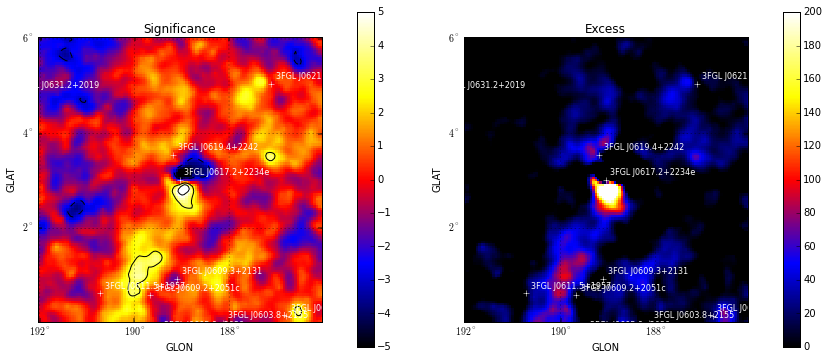

In [7]:
o = resid
from fermipy.plotting import ROIPlotter
fig = plt.figure(figsize=(14,6))
ROIPlotter(o[0]['sigma'],gta.roi).plot(vmin=-5,vmax=5,levels=[-5,-3,3,5],subplot=121)
plt.gca().set_title('Significance')
ROIPlotter(o[0]['excess'],gta.roi).plot(vmin=0,vmax=200,subplot=122)
plt.gca().set_title('Excess')

In [8]:
resid_noj0621 = gta.residmap('ic443_roifit_noj0621',
                models=[{'SpatialModel' : 'PointSource', 'Index' : 2.0}],
                exclude=['3FGL J0621.0+2514'])


2015-11-17 23:47:36 - GTAnalysis - INFO - Generating residual maps
2015-11-17 23:47:36 - ResidMapGenerator - INFO - Generating Residual map
2015-11-17 23:47:36 - ResidMapGenerator - INFO - {'Index': 2.0, 'SpatialModel': 'PointSource'}
2015-11-17 23:47:36 - GTAnalysis - INFO - Adding source testsource
2015-11-17 23:47:39 - GTAnalysis - INFO - Deleting source testsource


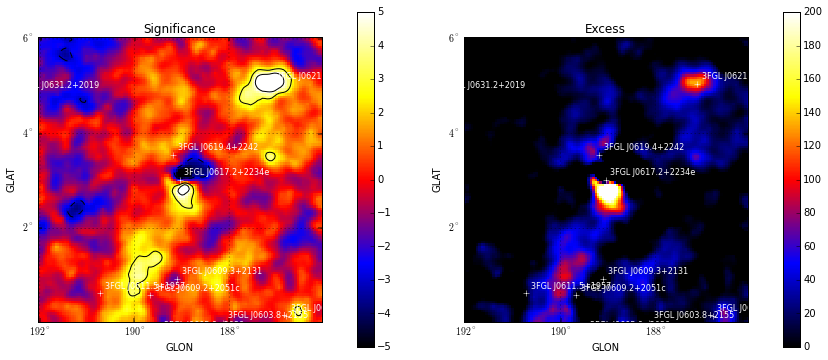

In [9]:
o = resid_noj0621
from fermipy.plotting import ROIPlotter
fig = plt.figure(figsize=(14,6))
ROIPlotter(o[0]['sigma'],gta.roi).plot(vmin=-5,vmax=5,levels=[-5,-3,3,5],subplot=121)
plt.gca().set_title('Significance')
ROIPlotter(o[0]['excess'],gta.roi).plot(vmin=0,vmax=200,subplot=122)
plt.gca().set_title('Excess')

## Measuring Source Extension

After optimizing the model we are ready to run an extension analysis on IC 443.  As reported in [Abdo et al. 2010](http://adsabs.harvard.edu/cgi-bin/bib_query?arXiv:1002.2198), this source has a spatial extension of 0.27 deg $\pm$ 0.01 (stat).  We can run an extension test of this source by calling the *extension* method with the source name.  The extension method has a number of options which can be used to modify its behavior.  To see the default settings we can look at the extension sub-dictionary of the config property of our GTAnalysis instance.

In [10]:
import pprint
pprint.pprint(gta.config['extension'])

{'fix_background': False,
 'save_model_map': False,
 'save_templates': False,
 'spatial_model': 'GaussianSource',
 'width': None,
 'width_max': 1.0,
 'width_min': 0.00316,
 'width_nstep': 26}


By default the method will use a 2D Gaussian source template and scan the width parameter between 0.00316 and 1 degrees in 26 steps.  The *width* parameter can be used to provide an explicit  vector of points for the scan.  Since we know the extension of IC 443 is well localized around 0.27 deg we use a width vector centered around this point.  The analysis results are returned as an output dictionary and are also written to the internal source object of the GTAnalysis instance.

In [11]:
ext_gauss = gta.extension('ic443',width=np.linspace(0.25,0.30,21))
gta.write_roi('ext_gauss_fit')

2015-11-17 23:47:47 - GTAnalysis - INFO - Running extension analysis for 3FGL J0617.2+2234e
2015-11-17 23:47:49 - GTBinnedAnalysis - INFO - Generating model map for component 00.
2015-11-17 23:47:52 - GTAnalysis - INFO - Adding source 3FGL J0617.2+2234e_ptsrc
2015-11-17 23:47:58 - GTAnalysis - INFO - Deleting source 3FGL J0617.2+2234e_ptsrc
2015-11-17 23:47:58 - GTAnalysis - INFO - Adding source 3fgl_j0617.2+2234e_ext
2015-11-17 23:47:59 - GTBinnedAnalysis - INFO - Creating source map for 3fgl_j0617.2+2234e_ext
2015-11-17 23:47:59 - GTBinnedAnalysis - INFO - Updating source map file for component 00.
2015-11-17 23:47:59 - GTBinnedAnalysis - INFO - Updating source map for 3fgl_j0617.2+2234e_ext
2015-11-17 23:48:05 - GTAnalysis - INFO - Deleting source 3fgl_j0617.2+2234e_ext
2015-11-17 23:48:05 - GTAnalysis - INFO - Adding source 3fgl_j0617.2+2234e_ext
2015-11-17 23:48:05 - GTBinnedAnalysis - INFO - Creating source map for 3fgl_j0617.2+2234e_ext
2015-11-17 23:48:05 - GTBinnedAnalysis - I

To inspect the results of the analysis we can make a plot of the likelihood profile.  From this we can see that the spatial extension is in good agreement with the value from Abdo et al. 2010.  

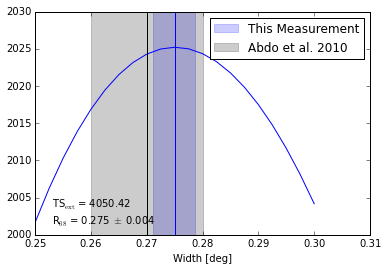

In [12]:
plt.figure()
plt.plot(ext_gauss['width'],ext_gauss['dlogLike'])
plt.gca().set_xlabel('Width [deg]')
plt.gca().axvline(ext_gauss['ext'])
plt.gca().axvspan(ext_gauss['ext']-ext_gauss['ext_err_lo'],ext_gauss['ext']+ext_gauss['ext_err_hi'],
                      alpha=0.2,label='This Measurement',color='b')

plt.gca().axvline(0.27,color='k')
plt.gca().axvspan(0.27-0.01,0.27+0.01,alpha=0.2,label='Abdo et al. 2010',color='k')

plt.annotate('TS$_{\mathrm{ext}}$ = %.2f\nR$_{68}$ = %.3f $\pm$ %.3f'%
            (ext_gauss['ts_ext'],ext_gauss['ext'],ext_gauss['ext_err']),xy=(0.05,0.05),xycoords='axes fraction')
plt.gca().legend()

As an additional cross-check we can look at what happens when we free nearby sources and rerun the extension analysis.